# ISLR Chapter 2

## Exercise 7:

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

| Obs. | X1 | X2 | X3 |   Y   |
|:----:|:--:|:--:|:--:|:-----:|
|   1  |  0 |  3 |  0 |  Red  |
|   2  |  2 |  0 |  0 |  Red  |
|   3  |  0 |  1 |  3 |  Red  |
|   4  |  0 |  1 |  2 | Green |
|   5  | −1 |  0 |  1 | Green |
|   6  |  1 |  1 |  1 |  Red  |

#### 7. a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [42]:
# Observations
obs1 <- c(0, 3, 0)
obs2 <- c(2, 0, 0)
obs3 <- c(0, 1, 3)
obs4 <- c(0, 1, 2)
obs5 <- c(-1, 0, 1)
obs6 <- c(1, 1, 1)

# Test Point
obs0 <- c(0, 0, 0)

# Create a Matrix x to store the results
x <- matrix( , nrow = 1, ncol = 6, dimnames = list(c("Distance"), c("obs1","obs2","obs3","obs4","obs5","obs6")))

# Compute and store the Euclidean distances
x[1,1] <- (dist1 <- sqrt(sum((obs1-obs0)^2)) )
x[1,2] <- (dist2 <- sqrt(sum((obs2-obs0)^2)) )
x[1,3] <- (dist3 <- sqrt(sum((obs3-obs0)^2)) )
x[1,4] <- (dist4 <- sqrt(sum((obs4-obs0)^2)) )
x[1,5] <- (dist5 <- sqrt(sum((obs5-obs0)^2)) )
x[1,6] <- (dist6 <- sqrt(sum((obs6-obs0)^2)) )

# Print the results
print(x)
# x

         obs1 obs2     obs3     obs4     obs5     obs6
Distance    3    2 3.162278 2.236068 1.414214 1.732051


#### 7. b) What is our prediction with K = 1? Why?

Closest 1 neighbor is obs5 and thus, our prediction is Green because it is the Y value associated to obs5.

#### 7. c) What is our prediction with K = 3? Why?

Closest 3 neighbors are obs5, obs6, obs2 and thus, our prediction is Red because it is the Y value associated to obs2 and obs6.


#### 7. d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?
A large value of K means that the Y-values from a large neighborhood are contributing to the prediction at one chosen X-point. This requires that the neighborhood consists of relatively similar Y-values. However, in the case of a highly nonlinear decision boundary, the neighborhoods of similar Y-values become generally small. Therefore, also K must be chosen relatively small so that we can capture more of the non-linear decision boundary. 

## Exercise 8:

This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US. The variables are:

* **Private** : Public/private indicator
* **Apps** : Number of applications received
* **Accept** : Number of applicants accepted
* **Enroll** : Number of new students enrolled
* **Top10perc** : New students from top 10% of high school class
* **Top25perc** : New students from top 25% of high school class
* **F.Undergrad** : Number of full-time undergraduates
* **P.Undergrad** : Number of part-time undergraduates
* **Outstate** : Out-of-state tuition
* **Room.Board** : Room and board costs
* **Books** : Estimated book costs
* **Personal** : Estimated personal spending
* **PhD** : Percent of faculty with Ph.D.’s
* **Terminal** : Percent of faculty with terminal degree
* **S.F.Ratio** : Student/faculty ratio
* **perc.alumni** : Percent of alumni who donate
* **Expend** : Instructional expenditure per student
* **Grad.Rate** : Graduation rate

#### 8. a) Use the read.csv() function to read the data into R. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.

In [43]:
# Store data into dataframe college
college <- read.csv("College.csv")

# Print first 10 rows and 5 collumns of the data
print(college[c(1:10),c(1:5)])

                              X Private Apps Accept Enroll
1  Abilene Christian University     Yes 1660   1232    721
2            Adelphi University     Yes 2186   1924    512
3                Adrian College     Yes 1428   1097    336
4           Agnes Scott College     Yes  417    349    137
5     Alaska Pacific University     Yes  193    146     55
6             Albertson College     Yes  587    479    158
7       Albertus Magnus College     Yes  353    340    103
8                Albion College     Yes 1899   1720    489
9              Albright College     Yes 1038    839    227
10    Alderson-Broaddus College     Yes  582    498    172


#### 8. b) Look at the data using the fix() function. 

You should notice that the first column is just the name of each university.We don’t really want R to treat this as data. However, it may be handy to have these names for later. Try the following commands: 

In [44]:
# Store rownames
rownames(college)=college[,1]

# pops up a window for data visualization
fix(college)

You should see that there is now a row.names column with the name of each university recorded. This means that R has given each row a name corresponding to the appropriate university. R will not try to perform calculations on the row names. However, we still need to eliminate the first column in the data where the names are stored. Try:

In [45]:
# ELiminates first collumn
college = college[,-1]

fix(college)

Now you should see that the first data column is Private. Note that another column labeled row.names now appears before the Private column. However, this is not a data column but rather the name that R is giving to each row.

#### 8. c. i) Use the summary() function to produce a numerical summary of the variables in the data set.

In [46]:
summary(college[ , 1:5])

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  

#### 8. c. ii) Use the pairs() function to produce a scatterplot matrix of the first ten columns or variables of the data. Recall that you can reference the first ten columns of a matrix A using A[,1:10].

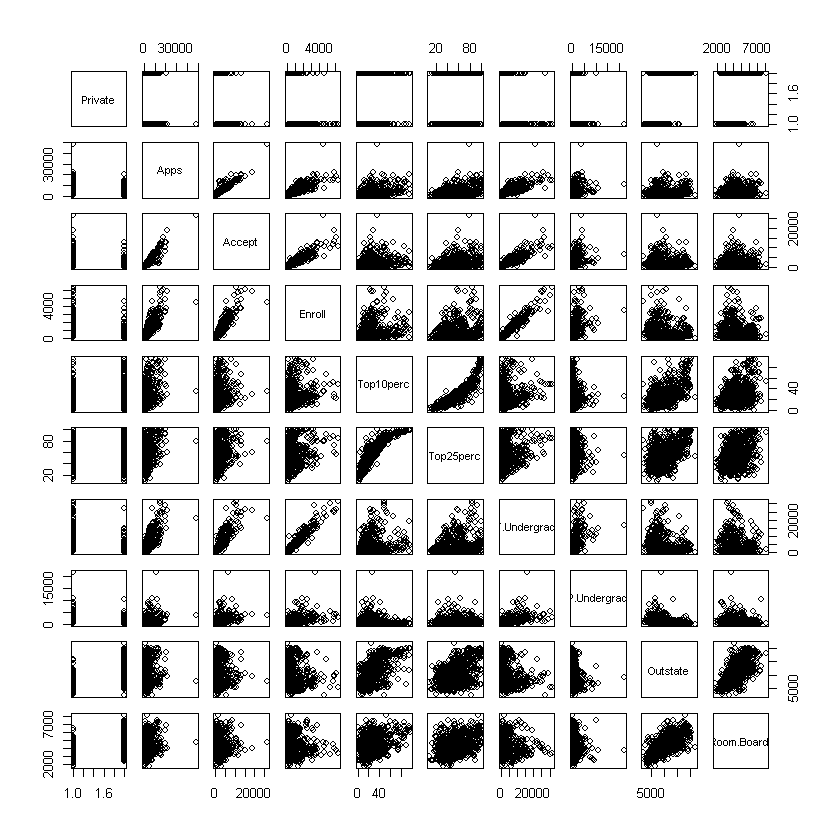

In [47]:
pairs(college[,1:10])

#### 8. c. iii) Use the plot() function to produce side-by-side boxplots of Outstate versus Private.

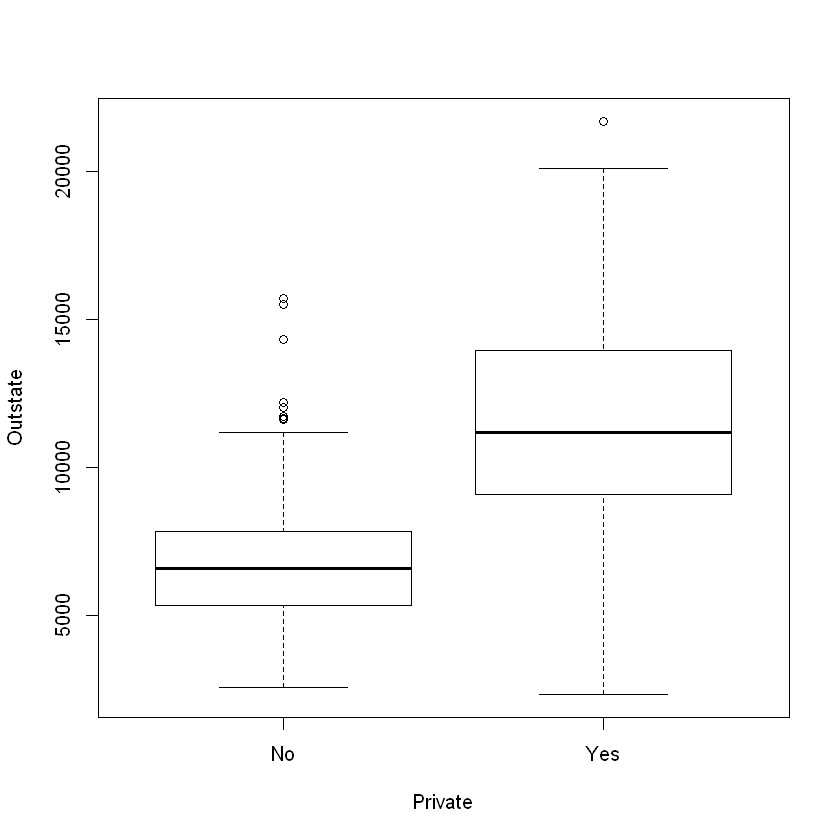

In [48]:
boxplot(Outstate~Private, data=college, xlab="Private", ylab="Outstate")

#### 8. c. iv) Create a new qualitative variable, called Elite, by binning the Top10perc variable. 
We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.

In [49]:
# Creating a vector called ELite with only "No" entrances amounting the number of college rows
Elite=rep("No",nrow(college))

# Replacing "No" with "Yes" if the proportion of students coming from the top 10% of their HS classes exceeds 50%.
Elite[college$Top10perc>50]="Yes"

# Encode a vector as a factor
Elite=as.factor(Elite)

# Add Elite variable to our current dataset "college"
college=data.frame(college ,Elite)

Use the summary() function to see how many elite universities there are.

In [50]:
summary(college$Elite)

No Yes 
699  78

Now use the plot() function to produce side-by-side boxplots of Outstate versus Elite.

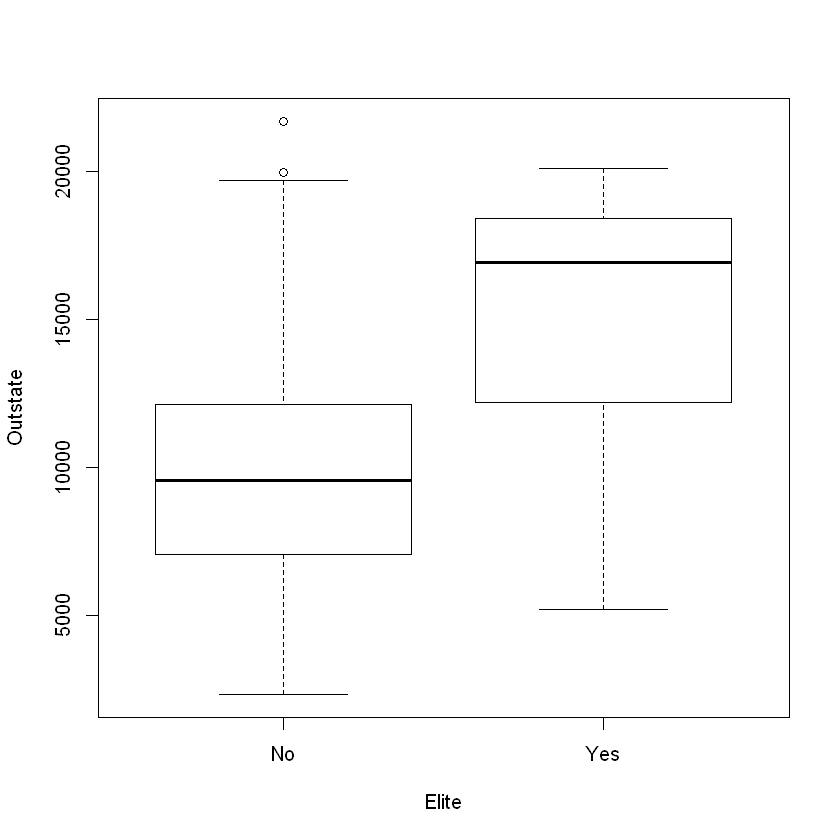

In [51]:
boxplot(Outstate~Elite, data=college, xlab="Elite", ylab="Outstate")

#### 8. c. v) Use the hist() function to produce some histograms with differing numbers of bins for a few of the quantitative variables.
You may find the command par(mfrow=c(2,2)) useful: it will divide the print window into four regions so that four plots can be made simultaneously. Modifying the arguments to this function will divide the screen in other ways.

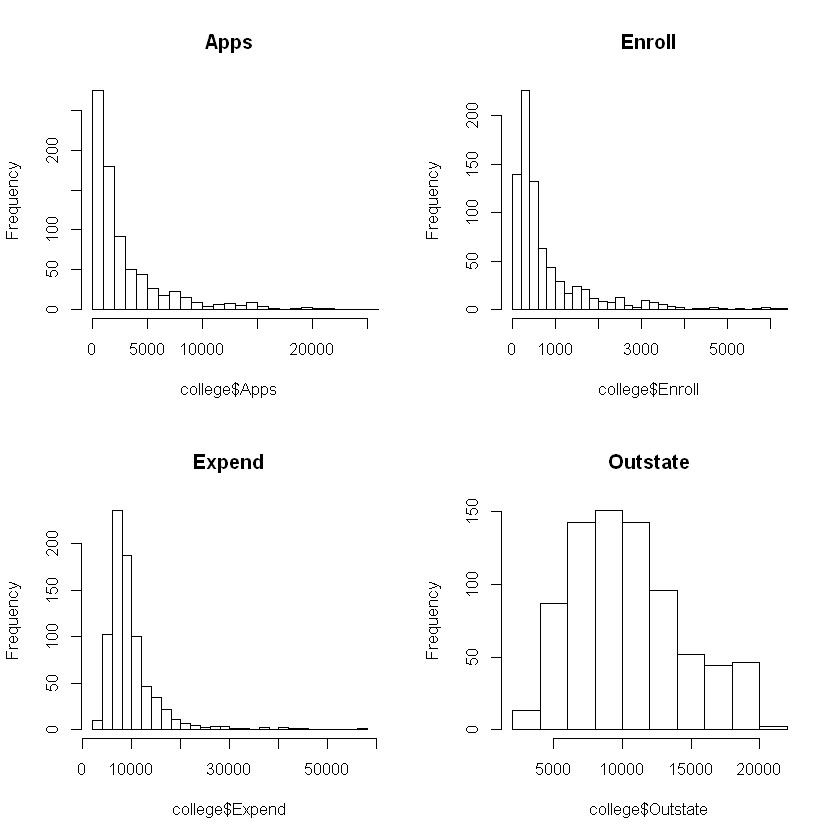

In [52]:
par(mfrow=c(2,2))
hist(college$Apps, breaks=50, xlim=c(0,25000), main="Apps")
hist(college$Enroll, breaks=25, main="Enroll")
hist(college$Expend, breaks=25, main="Expend")
hist(college$Outstate, main="Outstate")

## Exercise 9:

This exercise involves the Auto data set. Make sure that the missing values have been removed from the data.

In [53]:
# Store data into dataframe college
Auto <- read.csv("Auto.csv", header=T, na.strings="?")

# Remove missing values from the data
Auto = na.omit(Auto)

# Print first 10 rows of the data
print(Auto[c(1:10),])

# more info on the variables https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html

   mpg cylinders displacement horsepower weight acceleration year origin
1   18         8          307        130   3504         12.0   70      1
2   15         8          350        165   3693         11.5   70      1
3   18         8          318        150   3436         11.0   70      1
4   16         8          304        150   3433         12.0   70      1
5   17         8          302        140   3449         10.5   70      1
6   15         8          429        198   4341         10.0   70      1
7   14         8          454        220   4354          9.0   70      1
8   14         8          440        215   4312          8.5   70      1
9   14         8          455        225   4425         10.0   70      1
10  15         8          390        190   3850          8.5   70      1
                        name
1  chevrolet chevelle malibu
2          buick skylark 320
3         plymouth satellite
4              amc rebel sst
5                ford torino
6           ford galaxi

#### 9. a) Which of the predictors are quantitative, and which are qualitative?

In [54]:
# Summarize dataset
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

**Quantitative predictors:** mpg, cylinders, displacement, horsepower, weight, acceleration, year
**Qualitative predictors:** name, origin

#### 9. b) What is the range of each quantitative predictor? You can answer this using the range() function.

In [55]:
# apply the range function to the first seven columns of Auto
c <- sapply(Auto[, 1:7], range)

# print
print(c)
# c

      mpg cylinders displacement horsepower weight acceleration year
[1,]  9.0         3           68         46   1613          8.0   70
[2,] 46.6         8          455        230   5140         24.8   82


#### 9. c) What is the mean and standard deviation of each quantitative predictor?

In [56]:
# compute mean for the first seven variables and store it in a vector
mean <- sapply(Auto[,1:7], mean)

# round the values inside the vectors to 2 decimal cases
mean <- sapply(mean,round,2)

# compute the standard deviation and round it up 
sd <- sapply(Auto[, 1:7], sd)
sd <- sapply(sd,round,2)

# print both vectors
mean
sd

mpg    cylinders displacement   horsepower       weight acceleration 
       23.45         5.47       194.41       104.47      2977.58        15.54 
        year 
       75.98

mpg    cylinders displacement   horsepower       weight acceleration 
        7.81         1.71       104.64        38.49       849.40         2.76 
        year 
        3.68

#### 9.d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [57]:
# remove observations and store them 
newAuto = Auto[-(10:85),]

# Re-do exercises 9. b) and 9.c)
# This time, create a Matrix "Results" to store the results
Results <- matrix( , nrow = 4, ncol = 7, dimnames = list(c("Mean", "Standard Deviation", "Minimum", "Maximum"), c(colnames(newAuto[,1:7]))))

# Store the results
Results[1,] <- sapply(newAuto[, 1:7], mean)
Results[2,] <- sapply(newAuto[, 1:7], sd)
Results[3,] <- sapply(newAuto[, 1:7], min)
Results[4,] <- sapply(newAuto[, 1:7], max)

# Round them
Results[] <- sapply(Results[],round,2)

# Print the results
# Results
print(Results[,1:6])

                     mpg cylinders displacement horsepower  weight acceleration
Mean               24.40      5.37       187.24     100.72 2935.97        15.73
Standard Deviation  7.87      1.65        99.68      35.71  811.30         2.69
Minimum            11.00      3.00        68.00      46.00 1649.00         8.50
Maximum            46.60      8.00       455.00     230.00 4997.00        24.80


#### 9. e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

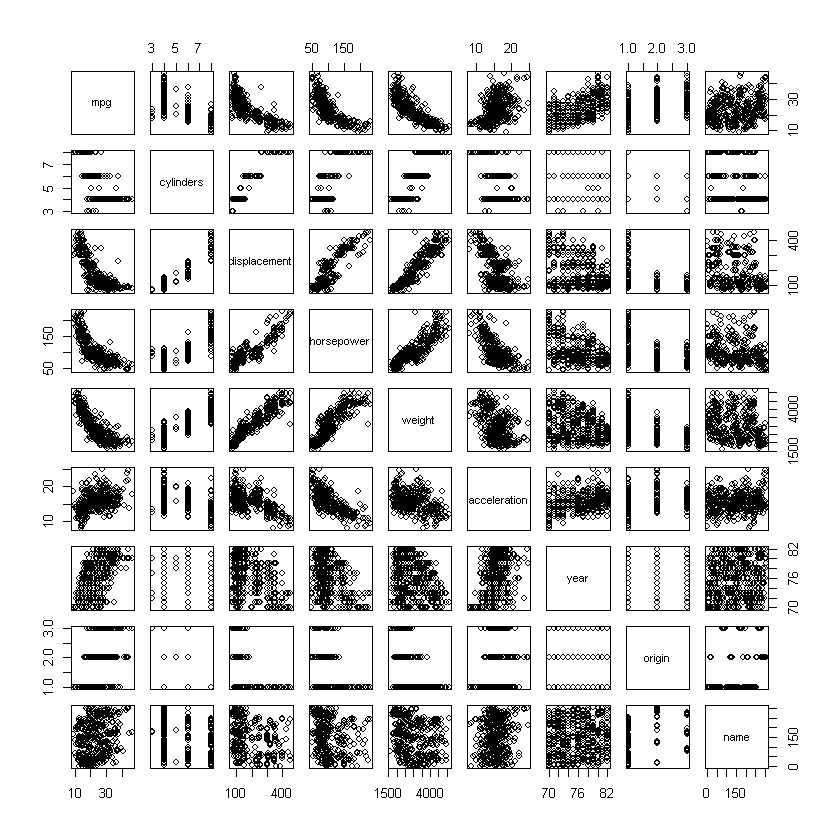

In [58]:
pairs(Auto)

* heavier weight is related with lower mpg and with higher horsepower;
* higher horsepower correlates with lower acceleration;
* mpg (miles per gallon) mostly increases for newer model years meaning that cars become more efficient over time.

#### 9. f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

Yes. On the one hand, as we can see from the plot above, all of the quantitative variables show some sort of relation (either linear or non-linear) with mpg and hence, they might be useful in predicting mpg. The origin qualitative variable might also be useful in predicting mpg, with cars originated from region 3 being associated with higher mpg. On the other hand, the name predictor has too little observations per name though, so using this as a predictor is likely to result in overfitting the data and will not generalize well.